# **DEVELOPING A MACHINE LEARNING MODEL TO PREDICT THE LIKELIHOOD OF A HEART ATTACK**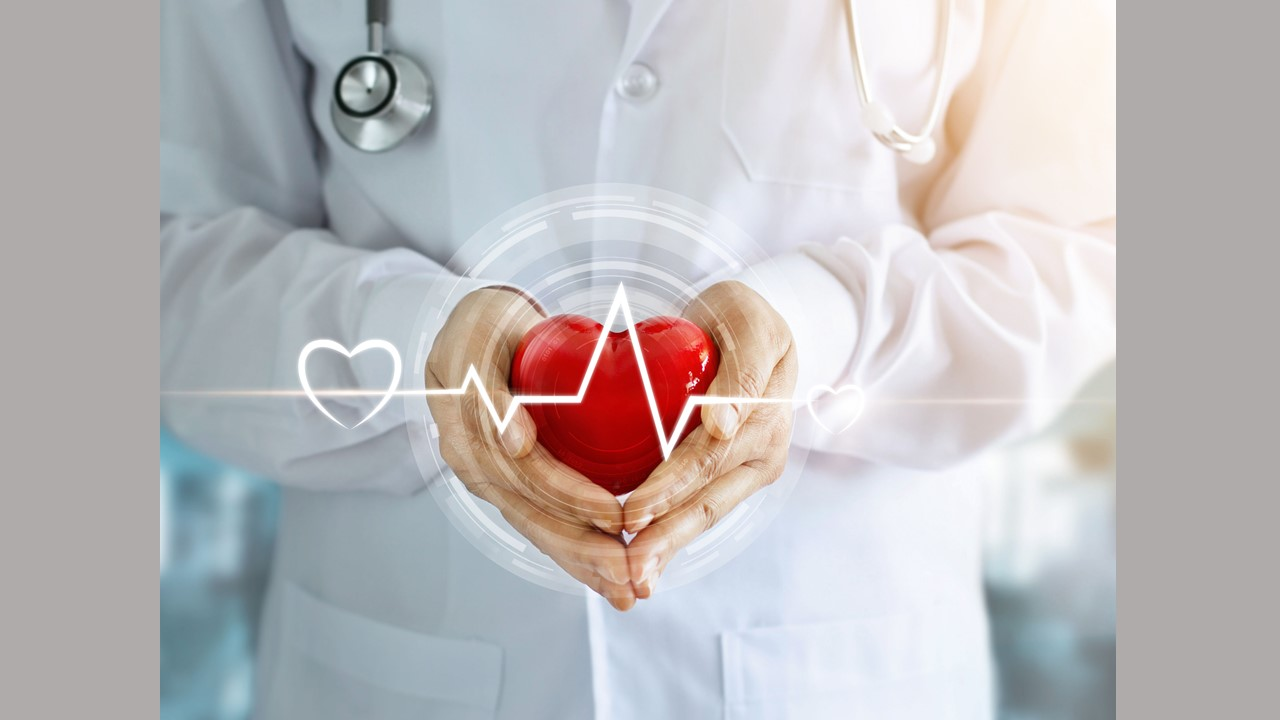

# OVERVIEW 
IntelliMed is a healthcare analytics vendor that aims to enhance patient care by assisting medical practitioners with clinical insights using data analytics. To address the need for predicting cardiac arrest, one of the leading causes of death in Australia, the IntelliMed analytics team has tasked their data analytics professional with developing a machine learning model. This model building will involve data pre-processing, data exploration, feature engineering, predictive modelling, classification models, ensemble approaches, and model explainability. The ultimate goal is to develop a robust and accurate model that can predict the likelihood of a heart attack and provide valuable insights for medical practitioners.

# Load Dataset

In [ ]:
# Data Manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train_dataset.csv')

In [ ]:
df_test = pd.read_csv('test_dataset.csv')

# Data Exploration

In [ ]:
df.head(5)

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1000,42,M,ATA,120,198,0,Normal,155,N,0.0,Up,0
1,PT1001,54,M,ASY,140,239,0,Normal,160,N,1.2,Up,0
2,PT1002,60,M,NAP,141,316,1,ST,122,Y,1.7,Flat,1
3,PT1003,54,M,ASY,124,266,0,LVH,109,Y,2.2,Flat,1
4,PT1004,55,M,ATA,160,292,1,Normal,143,Y,2.0,Flat,1


The first 5 rows of the dataset which contains data related to patients with heart disease.   
The data consists of various features such as age, gender, chest pain type, resting blood pressure, cholesterol level, etc. Additionally, the last column, ‘HeartDisease’ – target variable, indicates whether the patient has heart disease or not. The values in this column are either 0 or 1. A value of 0 indicates that the patient is normal and a value of 1 indicates that the patient has heart disease.

In [ ]:
df_test.head(5)

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,PT1800,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down
1,PT1801,58,M,ASY,114,318,0,ST,140,N,4.4,Down
2,PT1802,47,F,ATA,140,257,0,Normal,135,N,1.0,Up
3,PT1803,64,M,ASY,141,244,1,ST,116,Y,1.5,Flat
4,PT1804,47,M,NAP,110,0,1,Normal,120,Y,0.0,Flat


Data summary

In [ ]:
print('Train Shape (rows, columns):', df.shape)

Train Shape (rows, columns): (734, 13)


In [ ]:
print('Test Shape (rows, columns):', df_test.shape)

Test Shape (rows, columns): (184, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              734 non-null    object 
 1   Age             734 non-null    int64  
 2   Gender          734 non-null    object 
 3   ChestPainType   734 non-null    object 
 4   RestingBP       734 non-null    int64  
 5   Cholesterol     734 non-null    int64  
 6   FastingBS       734 non-null    int64  
 7   RestingECG      734 non-null    object 
 8   MaxHR           734 non-null    int64  
 9   ExerciseAngina  734 non-null    object 
 10  Oldpeak         734 non-null    float64
 11  ST_Slope        734 non-null    object 
 12  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 74.7+ KB


The dataset contains 734 rows and 13 columns, with 6 integer, 1 float, and 6 object data types.

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              184 non-null    object 
 1   Age             184 non-null    int64  
 2   Gender          184 non-null    object 
 3   ChestPainType   184 non-null    object 
 4   RestingBP       184 non-null    int64  
 5   Cholesterol     184 non-null    int64  
 6   FastingBS       184 non-null    int64  
 7   RestingECG      184 non-null    object 
 8   MaxHR           184 non-null    int64  
 9   ExerciseAngina  184 non-null    object 
 10  Oldpeak         184 non-null    float64
 11  ST_Slope        184 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 17.4+ KB


Check missing values

In [ ]:
df.isnull().sum()

Id                0
Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in data. Therefore, there is no need to remove or replace any null values with median or mean. However, there may be other problems within the dataset that require attention and will be explored and solved further below. 

In [ ]:
df_test.isnull().sum()

Id                0
Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.602180,132.957766,198.339237,0.234332,136.426431,0.902180,0.553134
std,9.528147,18.819299,109.263181,0.423870,25.729613,1.050003,0.497508
min,28.000000,0.000000,0.000000,0.000000,63.000000,-2.000000,0.000000
25%,47.000000,120.000000,172.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.500000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,141.750000,265.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The Cholesterol and RestingBP column has many 0 values, which is not impossible for humans. Hence, these uncommon points will be fixed in feature engineering  part. 

In [ ]:
df_test.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,53.146739,130.157609,200.635870,0.228261,138.336957,0.828261
std,9.057508,17.108849,110.145225,0.420857,24.364391,1.131306
min,32.000000,94.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,179.750000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,140.000000,0.250000
75%,60.000000,140.000000,271.500000,0.000000,158.000000,1.500000
max,74.000000,190.000000,529.000000,1.000000,192.000000,5.000000


The distribution of each variable in the dataset: Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, and HeartDisease.  


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

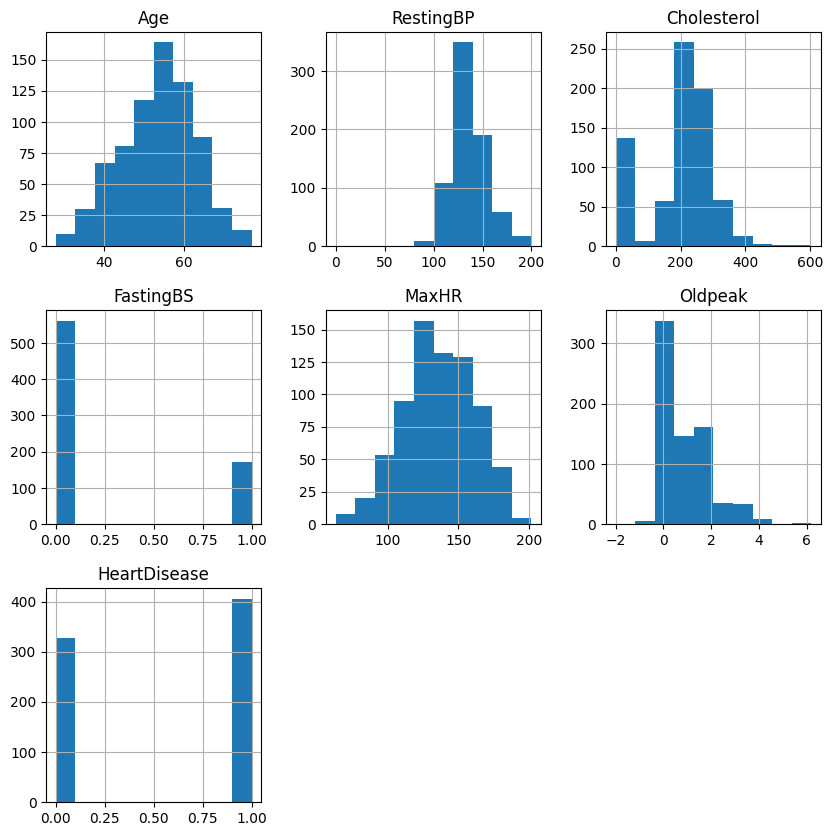

In [ ]:
df.hist(figsize=(10, 10))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>]], dtype=object)

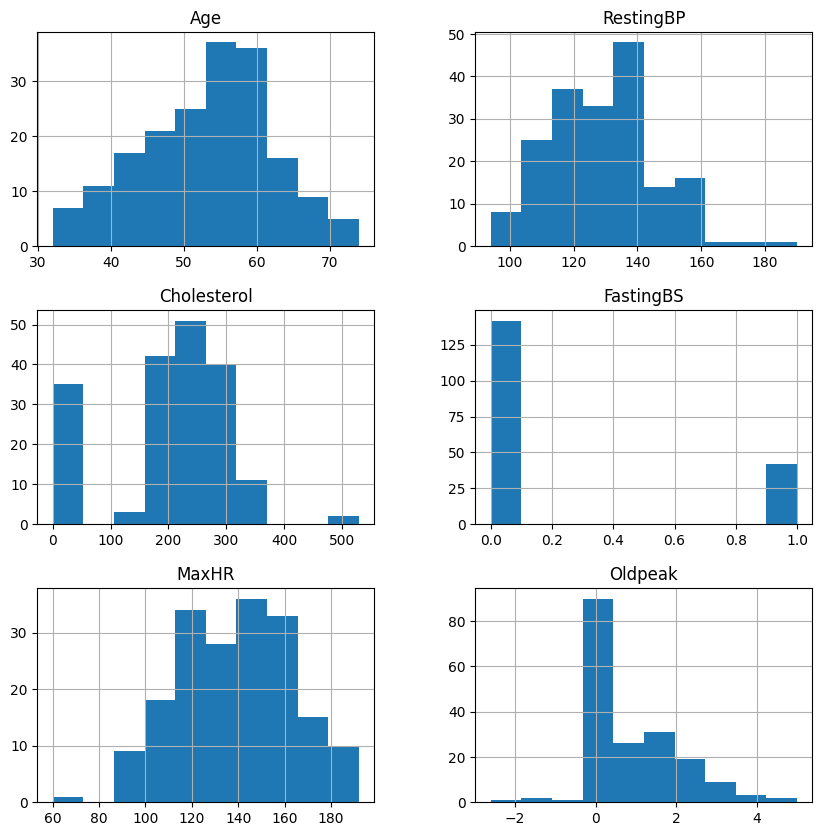

In [ ]:
df_test.hist(figsize=(10, 10))

<ipython-input-16-4cae9bc744cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('HeartDisease', axis=1).corrwith(df.HeartDisease).plot(kind='bar', grid=True, figsize=(12,8), title="Correlation with Heart Disease")


<Axes: title={'center': 'Correlation with Heart Disease'}>

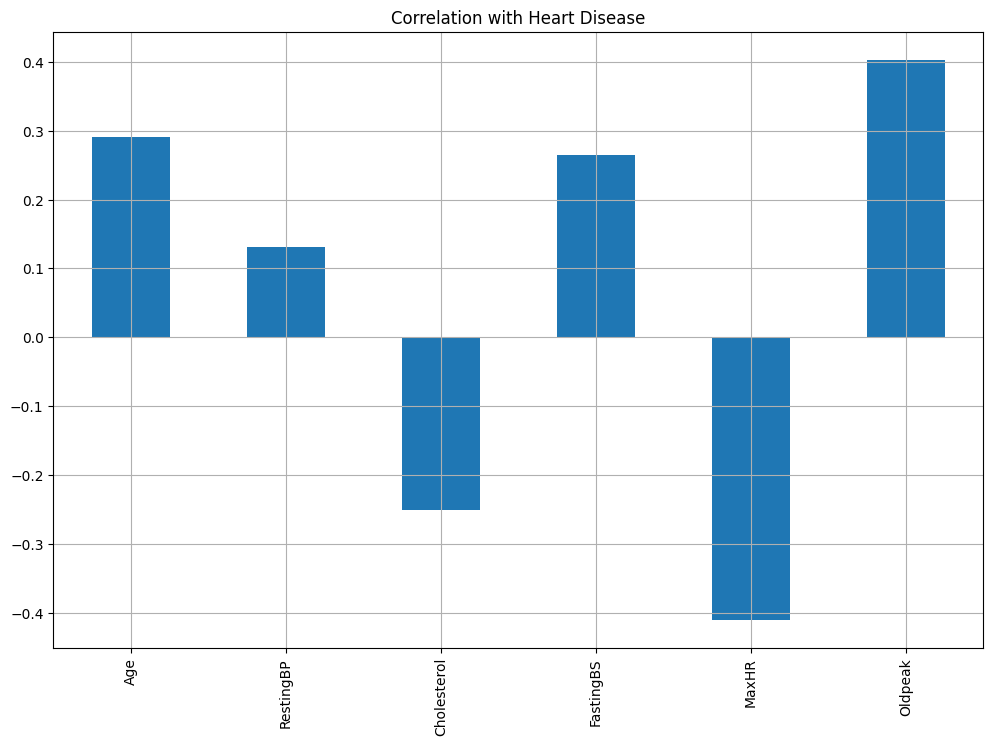

In [ ]:
df.drop('HeartDisease', axis=1).corrwith(df.HeartDisease).plot(kind='bar', grid=True, figsize=(12,8), title="Correlation with Heart Disease")


There is a positive correlation between the variables Age, RestingBP, FastingBS, and Oldpeak with Heart Disease. On the other hand, there is a negative correlation between Cholesterol and MaxHR with Heart Disease.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

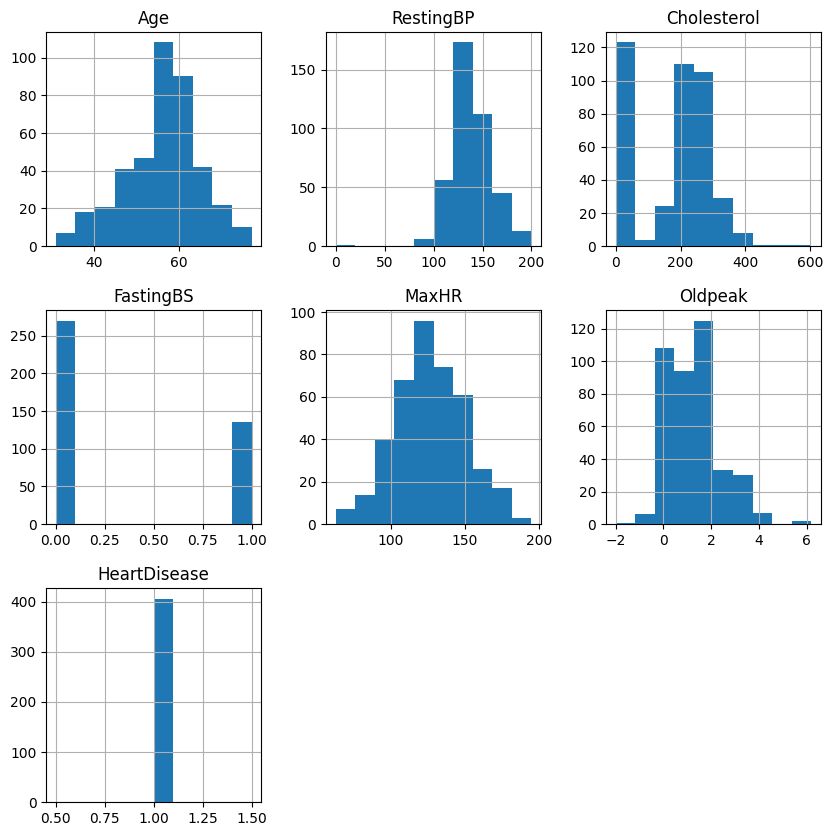

In [ ]:
df[df['HeartDisease'] == 1].hist(figsize=(10, 10))

* It can be seen that there is a higher concentration of heart disease patients in the age range of 55 to 61 years old. This age group has the highest count of heart disease patients compared to other age groups in the dataset.
* Resting blood pressure is one of the risk factors that can indicate the likelihood of having heart disease. A normal resting blood pressure is considered to be around 120/80 mmHg. The histogram of RestingBP illustrates that most of heart disease patients have a resting blood pressure reading between 125 mmHg to 160 mmHg. 
* The American Heart Association recommends that adults aim for a total cholesterol level of less than 200 milligrams per deciliter (mg/dL). The majority of patients diagnosed with heart disease have cholesterol levels ranging from 139 mg/dL to 300 mg/dL. This range of cholesterol levels is considered high and is a significant risk factor for the development of heart disease. Having high cholesterol levels can cause a buildup of plaque in the arteries, which can lead to atherosclerosis, a condition in which the arteries become narrow and restrict blood flow to the heart. As a result, the heart may not receive enough oxygen and nutrients, which can cause chest pain or angina, and eventually lead to a heart attack.
* Surprisingly there are more heart disease patients who do not have high fasting blood sugar levels exceeding 120mg/dl suggests that fasting blood sugar may not be a significant factor in distinguishing between patients with heart disease and those without it.
* The maximum heart rate is the highest number of times the heart can beat per minute during intense physical activity to supply the body with oxygen. The maximum heart rate of the marjority of heart disease patients is in the range of 110 bpm to 145 bpm. This range implies that the heart is functioning at a higher rate than its usual pace to meet the body's oxygen needs. 
* Oldpeak is a numeric value measured in depression of the ST segment, which is an indicator of the heart's response to physical activity.The vast majority of patients in the dataset diagnosed with heart disease have an old peak value greater than 0, which is generally considered bad for heart health.

In [ ]:
def bar_chart(df, feature):
    HeartDisease = df[df['HeartDisease']==1][feature].value_counts()
    total = sum(HeartDisease)
    percentages = [(count/total)*100 for count in HeartDisease]
    df = pd.DataFrame({feature: HeartDisease.index, 'HeartDisease': HeartDisease.values, 'Percentage': percentages})
    df.set_index(feature, inplace=True)
    ax = df['HeartDisease'].plot(kind='bar', stacked=True, figsize=(10,5), color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])
    for i, v in enumerate(df['Percentage']):
        ax.text(i, df['HeartDisease'][i]+1, f"{v:.1f}%", ha='center')
    ax.set_ylabel('Count')
    ax.set_title(f"Heart Disease by {feature}")
    plt.show()

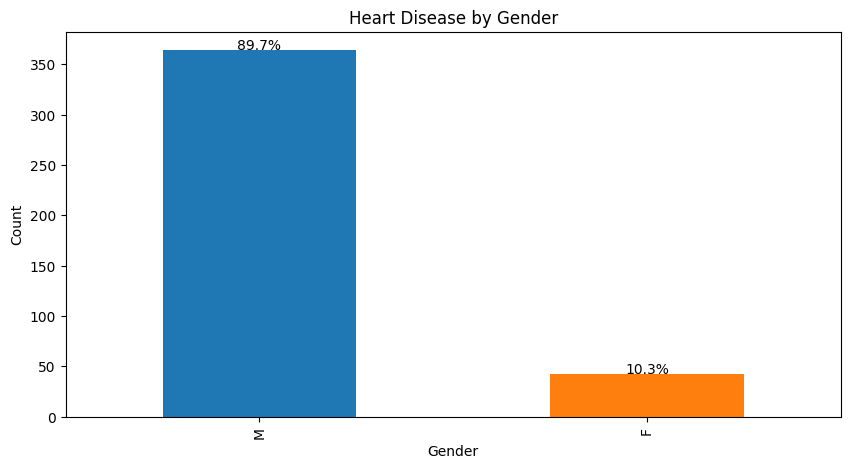

In [ ]:
bar_chart(df, 'Gender')

In [ ]:
df.groupby(['Gender', 'HeartDisease'])['Gender'].count()

Gender  HeartDisease
F       0               114
        1                42
M       0               214
        1               364
Name: Gender, dtype: int64

The prevalence of heart disease is higher in males compared to females.

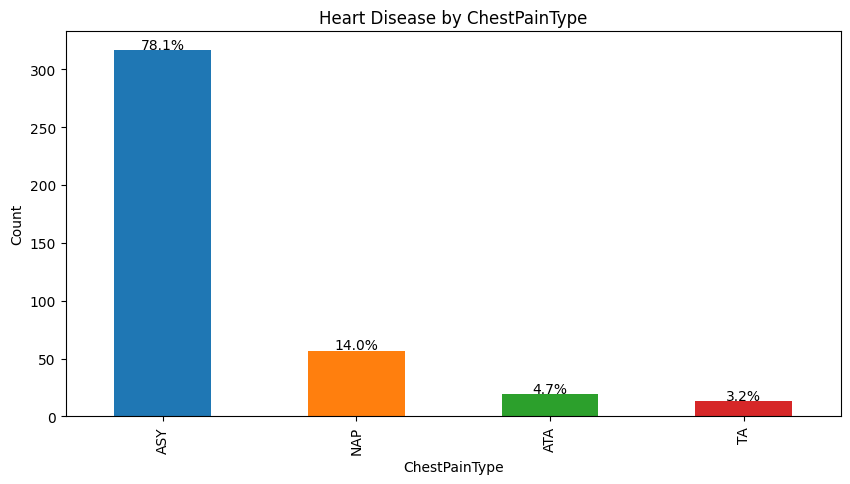

In [ ]:
bar_chart(df, 'ChestPainType')

In [ ]:
df.groupby(['ChestPainType', 'HeartDisease'])['ChestPainType'].count()

ChestPainType  HeartDisease
ASY            0                86
               1               317
ATA            0               115
               1                19
NAP            0               105
               1                57
TA             0                22
               1                13
Name: ChestPainType, dtype: int64

There are 4 types of chest pain including Typical Angina, Atypical Angina, Non-Anginal Pain and Asymptomatic. The chart above illustrates that most patients who have heart disease, do not experience any chest pain or other symptom (ASY – Asymptomatic), followed by individuals who face with non-anginal pain that may be caused by a variety of factors such as acid reflux, anxiety, or muscle strain.

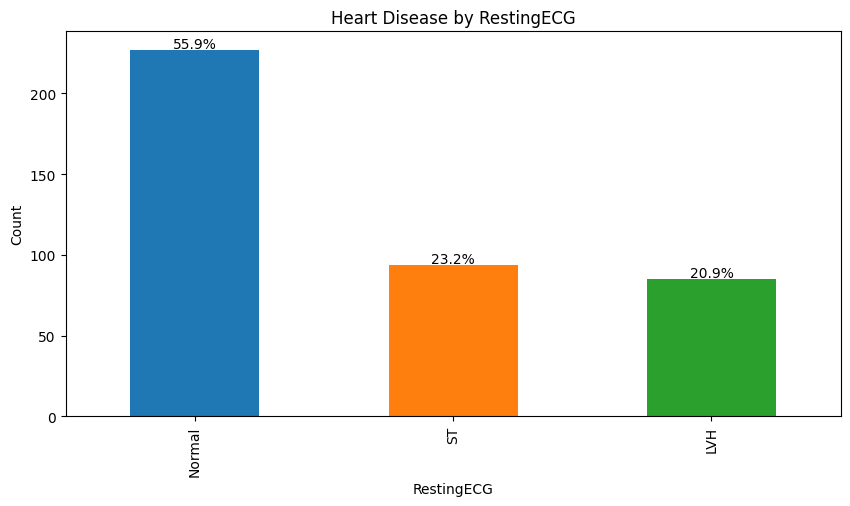

In [ ]:
bar_chart(df, 'RestingECG')

Resting electrocardiogram (ECG) results are a measure of the electrical activity of the heart. In this dataset, it is observed that 55.9% of heart disease patients have normal ECG results. On the other hand, 23.2% of heart disease patients have ST-T wave abnormality, which can indicate a problem with the blood flow to the heart. 20.9% of heart disease patients have LVH (left ventricular hypertrophy), which means that the muscle of the left ventricle of the heart has become thicker than normal. In this dataset, a high percentage of heart disease patients have normal ECG results, but significant percentages also have ST-T wave abnormality and LVH, which can indicate underlying heart problems.

# Wrangling and Feature Engineering

In [ ]:
df1 = df.copy()

df1.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1000,42,M,ATA,120,198,0,Normal,155,N,0.0,Up,0
1,PT1001,54,M,ASY,140,239,0,Normal,160,N,1.2,Up,0
2,PT1002,60,M,NAP,141,316,1,ST,122,Y,1.7,Flat,1
3,PT1003,54,M,ASY,124,266,0,LVH,109,Y,2.2,Flat,1
4,PT1004,55,M,ATA,160,292,1,Normal,143,Y,2.0,Flat,1


In [ ]:
df_test1 = df_test.copy()

df_test1.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,PT1800,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down
1,PT1801,58,M,ASY,114,318,0,ST,140,N,4.4,Down
2,PT1802,47,F,ATA,140,257,0,Normal,135,N,1.0,Up
3,PT1803,64,M,ASY,141,244,1,ST,116,Y,1.5,Flat
4,PT1804,47,M,NAP,110,0,1,Normal,120,Y,0.0,Flat


0 values imputation

Train

In [ ]:
df1['Cholesterol'] = df1['Cholesterol'].replace(0, df1['Cholesterol'].median())

In [ ]:
df1['RestingBP'] = df1['RestingBP'].replace(0, df1['RestingBP'].median())

Test

In [ ]:
df_test1['Cholesterol'] = df_test1['Cholesterol'].replace(0, df_test1['Cholesterol'].median())

In [ ]:
df_test1['RestingBP'] = df_test1['RestingBP'].replace(0, df_test1['RestingBP'].median())

Check outliers

We have previously seen that features like Cholesterol and Resting Blood Pressure present outliers or atypical cases which may not represent the condition of the general population and data type, therefore, these outliers are not useful to for modelling process and require treatments

<Axes: >

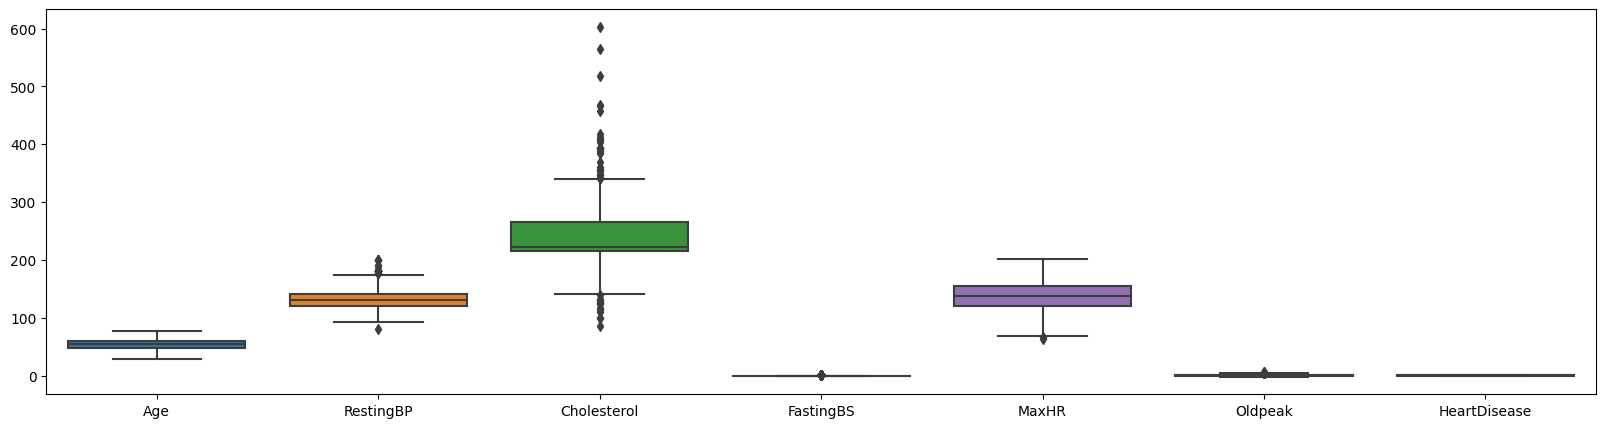

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df1)

Cholesterol

In [ ]:
# Train
# Calculate the 25th and 75th percentile (Q1 and Q3)
Q1 = df1['Cholesterol'].quantile(0.25)
Q3 = df1['Cholesterol'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use clip to set maximum or minimum to the points outside the range
df1['Cholesterol'] = df1['Cholesterol'].clip(lower_bound, upper_bound)

In [ ]:
# Test
# Calculate the 25th and 75th percentile (Q1 and Q3)
Q1 = df_test1['Cholesterol'].quantile(0.25)
Q3 = df_test1['Cholesterol'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use clip to set maximum or minimum to the points outside the range
df_test1['Cholesterol'] = df_test1['Cholesterol'].clip(lower_bound, upper_bound)

RestingBP

In [ ]:
# Train
# Calculate the 25th and 75th percentile (Q1 and Q3)
Q1 = df1['RestingBP'].quantile(0.25)
Q3 = df1['RestingBP'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use clip to set maximum or minimum to the points outside the range
df1['RestingBP'] = df1['RestingBP'].clip(lower_bound, upper_bound)

In [ ]:
# Test
# Calculate the 25th and 75th percentile (Q1 and Q3)
Q1 = df_test1['RestingBP'].quantile(0.25)
Q3 = df_test1['RestingBP'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use clip to set maximum or minimum to the points outside the range
df_test1['RestingBP'] = df_test1['RestingBP'].clip(lower_bound, upper_bound)

Remove unused attribute

In [ ]:
# Train
df1.drop('Id', axis=1, inplace=True)

In [ ]:
# Test
Id = df_test1['Id']
df_test1.drop('Id', axis=1, inplace=True)

Transforming Categorical Variables to Numeric Variables

Machine learning algorithms generally require numerical data to perform their calculations, so categorical variables need to be transformed into numerical variable:  
'ST_Slope' feature was initially categorical with values 'Flat', 'Up', and 'Down'. By mapping these values to 0, 1, and 2, respectively, we can use this feature in our machine learning model. Similarly, the other categorical features like 'ExerciseAngina', 'RestingECG', 'ChestPainType', and 'Gender' were mapped to numerical values using a dictionary mapping.





In [ ]:
# Train
ST_Slope_mapping = {"Flat": 0, "Up": 1, "Down": 2, }
df1['ST_Slope'] = df1['ST_Slope'].map(ST_Slope_mapping)

ExerciseAngina_mapping = {"Y": 0, "N": 1, }
df1['ExerciseAngina'] = df1['ExerciseAngina'].map(ExerciseAngina_mapping)

RestingECG_mapping = {"Normal": 0, "LVH": 1,"ST": 2, }
df1['RestingECG'] = df1['RestingECG'].map(RestingECG_mapping)

ChestPainType_mapping = {"ASY": 0, "NAP": 1,"ATA": 2,"TA": 3, }
df1['ChestPainType'] = df1['ChestPainType'].map(ChestPainType_mapping)

Gender_mapping = {"M": 0, "F": 1 }
df1['Gender'] = df1['Gender'].map(Gender_mapping)

In [ ]:
# Test
ST_Slope_mapping = {"Flat": 0, "Up": 1, "Down": 2, }
df_test1['ST_Slope'] = df_test1['ST_Slope'].map(ST_Slope_mapping)

ExerciseAngina_mapping = {"Y": 0, "N": 1, }
df_test1['ExerciseAngina'] = df_test1['ExerciseAngina'].map(ExerciseAngina_mapping)

RestingECG_mapping = {"Normal": 0, "LVH": 1,"ST": 2, }
df_test1['RestingECG'] = df_test1['RestingECG'].map(RestingECG_mapping)

ChestPainType_mapping = {"ASY": 0, "NAP": 1,"ATA": 2,"TA": 3, }
df_test1['ChestPainType'] = df_test1['ChestPainType'].map(ChestPainType_mapping)

Gender_mapping = {"M": 0, "F": 1 }
df_test1['Gender'] = df_test1['Gender'].map(Gender_mapping)

Binning

Binning/Converting Numerical Age to Categorial Variable:
* Adulthood 1: 28-44
* Adulthood 2: 45-61
* Late adulthood: 62-77

In [ ]:
# Train
df1.loc[df['Age'] <= 44, 'Age'] = 0
df1.loc[(df['Age'] > 44) & (df1['Age'] <= 61), 'Age'] = 1
df1.loc[df['Age'] > 61, 'Age'] = 2

In [ ]:
# Test
df_test1.loc[df_test1['Age'] <= 44, 'Age'] = 0
df_test1.loc[(df_test1['Age'] > 44) & (df_test1['Age'] <= 61), 'Age'] = 1
df_test1.loc[df_test1['Age'] > 61, 'Age'] = 2

Binning/Converting Numerical Cholesterol to Categorial Variable:   
* Below 150 mm/dL: Desirable  
* 150-199 mm/dL: Borderline high  
* 200-499 mm/dL: High  
* 500 mm/dL and above: Very high  
This range commonly used by medical professionals and organizations to classify cholesterol levels into different categories. By binning the numerical cholesterol values into these categories, it becomes easier to interpret and communicate the level of risk associated with a particular cholesterol value.

In [ ]:
# Train
df1.loc[ df1['Cholesterol'] <150, 'Cholesterol'] = 0
df1.loc[(df1['Cholesterol'] >=150) & (df1['Cholesterol'] <= 199), 'Cholesterol'] = 1
df1.loc[(df1['Cholesterol'] >=200) & (df1['Cholesterol'] <= 499), 'Cholesterol'] = 2
df1.loc[(df1['Cholesterol'] >500), 'Cholesterol'] = 3

In [ ]:
# Test
df_test1.loc[ df_test1['Cholesterol'] <150, 'Cholesterol'] = 0
df_test1.loc[(df_test1['Cholesterol'] >=150) & (df_test1['Cholesterol'] <= 199), 'Cholesterol'] = 1
df_test1.loc[(df_test1['Cholesterol'] >=200) & (df_test1['Cholesterol'] <= 499), 'Cholesterol'] = 2
df_test1.loc[(df_test1['Cholesterol'] >500), 'Cholesterol'] = 3

Binning/Converting Numerical Resting blood pressure to Categorial Variable:   
* Below 120 mmHg: Normal  
* 120 - 129 mmHg: Elevated  
* 130 - 139 mmHg: Stage 1 hypertension  
* 140 - 180 mmHg: Stage 2 hypertension   
* Higher than 180 mmHg: Hypertensive crisis  
These categories are based on the guidelines of the American Heart Association (AHA) for the diagnosis and management of high blood pressure. Resting blood pressure is a common risk factor for heart disease, and these categories help to identify individuals who may be at risk for developing cardiovascular problems. By categorizing blood pressure in this way, doctors can more easily communicate the risk of heart disease to patients and determine appropriate interventions to manage blood pressure levels.

In [ ]:
# Train
df1.loc[ df1['RestingBP'] <120, 'RestingBP'] = 0
df1.loc[(df1['RestingBP'] >=120) & (df1['RestingBP'] <= 129), 'RestingBP'] = 1
df1.loc[(df1['RestingBP'] >=130) & (df1['RestingBP'] <= 139), 'RestingBP'] = 2
df1.loc[(df1['RestingBP'] >=140 ) & (df1['RestingBP'] <= 180), 'RestingBP'] = 3
df1.loc[ df1['RestingBP'] >180, 'RestingBP'] = 4

In [ ]:
# Test
df_test1.loc[ df_test1['RestingBP'] <120, 'RestingBP'] = 0
df_test1.loc[(df_test1['RestingBP'] >=120) & (df_test1['RestingBP'] <= 129), 'RestingBP'] = 1
df_test1.loc[(df_test1['RestingBP'] >=130) & (df_test1['RestingBP'] <= 139), 'RestingBP'] = 2
df_test1.loc[(df_test1['RestingBP'] >=140 ) & (df_test1['RestingBP'] <= 180), 'RestingBP'] = 3
df_test1.loc[ df_test1['RestingBP'] >180, 'RestingBP'] = 4

Binning/Converting Numerical Maximum Heart Rate to Categorial Variable and grouping by Age: 
* 28-40: > 170 pbm
* 41-59: 140-170 pbm
* above 60: < 140 pbm  
Maximum heart rate (MaxHR) is an important measure for cardiovascular fitness. It represents the maximum number of times the heart can contract per minute during physical activity. As people age, their maximum heart rate tends to decrease. Therefore, we can use age as a criterion for grouping MaxHR into different categories.
For individuals aged 28-40, a MaxHR of over 170 bpm is considered excellent cardiovascular fitness. For those aged 41-59, a MaxHR of 140-170 bpm is still considered good, but not as high as the younger age group. For those above 60, a MaxHR below 140 bpm is more common and still indicates good cardiovascular fitness for their age group. By grouping MaxHR into these categories, we can gain a better understanding of an individual's cardiovascular fitness level based on their age.

In [ ]:
# Train
df1.loc[ df['MaxHR'] <140, 'MaxHR'] = 2
df1.loc[(df['MaxHR'] >=140) & (df1['MaxHR'] <= 170), 'MaxHR'] = 1
df1.loc[ df['MaxHR'] >170, 'MaxHR'] = 0

In [ ]:
# Test
df_test1.loc[ df_test1['MaxHR'] <140, 'MaxHR'] = 2
df_test1.loc[(df_test1['MaxHR'] >=140) & (df_test1['MaxHR'] <= 170), 'MaxHR'] = 1
df_test1.loc[ df_test1['MaxHR'] >170, 'MaxHR'] = 0

# Modelling and Evaluation

## Data split

In [ ]:
# Train
df_y = df1['HeartDisease']
df_x = df1.drop('HeartDisease', axis=1)

In [ ]:
# Test
df_x_test = df_test1

In [ ]:
from sklearn.model_selection  import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(df_x, df_y, test_size = 0.2, random_state = 5)

## Logistic Regression

### Modelling

In [ ]:
from sklearn import linear_model

reg = linear_model.LogisticRegression()
reg.fit(X_train, Y_train)

# Training accuracy
Y_train_predict = reg.predict(X_train)
# Validation accuracy
Y_val_predict = reg.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.848381601362862
Validation Classif Accuracy: 0.8775510204081632


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[210,  38],
       [ 51, 288]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.8834355828220859
Validation F1 Score: 0.85


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 0.8495575221238938
Validation Recall: 0.918918918918919


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.8661654135338346
Validation F1 Score: 0.8831168831168831


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       248
           1       0.88      0.85      0.87       339

    accuracy                           0.85       587
   macro avg       0.84      0.85      0.85       587
weighted avg       0.85      0.85      0.85       587

Validation report
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        73
           1       0.85      0.92      0.88        74

    accuracy                           0.88       147
   macro avg       0.88      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



AUC and ROC curve

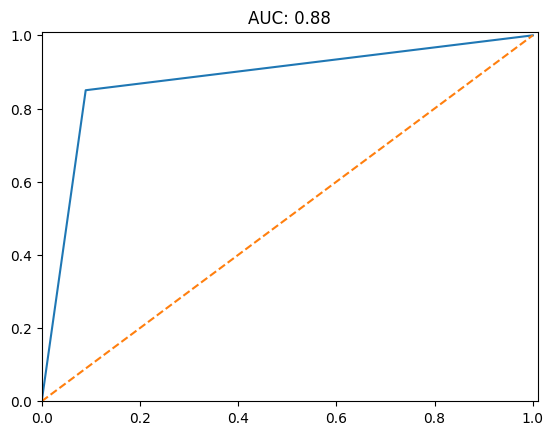

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison = pd.DataFrame({'Logistics Regression': [accuracy_val,precision_val,recall_val,f1_val,auc]},index=['accuracy','precision','recall','f1','auc'])

## Decision Tree Classification

### Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Training accuracy
Y_train_predict = dt.predict(X_train)
# Validation accuracy
Y_val_predict = dt.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.9914821124361158
Validation Classif Accuracy: 0.7959183673469388


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[261,   5],
       [  0, 321]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.9846625766871165
Validation F1 Score: 0.8375


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 1.0
Validation Recall: 0.7976190476190477


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.9922720247295209
Validation F1 Score: 0.8170731707317073


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       266
           1       0.98      1.00      0.99       321

    accuracy                           0.99       587
   macro avg       0.99      0.99      0.99       587
weighted avg       0.99      0.99      0.99       587

Validation report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        63
           1       0.84      0.80      0.82        84

    accuracy                           0.80       147
   macro avg       0.79      0.80      0.79       147
weighted avg       0.80      0.80      0.80       147



AUC and ROC curve

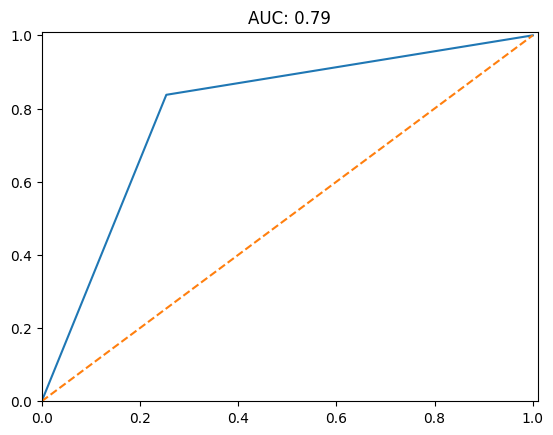

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison['Decision Tree'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## Random Forest

### Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Training accuracy
Y_train_predict = rf.predict(X_train)
# Validation accuracy
Y_val_predict = rf.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.9914821124361158
Validation Classif Accuracy: 0.891156462585034


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[258,   2],
       [  3, 324]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.9938650306748467
Validation F1 Score: 0.8875


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 0.9908256880733946
Validation Recall: 0.9102564102564102


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.992343032159265
Validation F1 Score: 0.8987341772151898


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       260
           1       0.99      0.99      0.99       327

    accuracy                           0.99       587
   macro avg       0.99      0.99      0.99       587
weighted avg       0.99      0.99      0.99       587

Validation report
               precision    recall  f1-score   support

           0       0.90      0.87      0.88        69
           1       0.89      0.91      0.90        78

    accuracy                           0.89       147
   macro avg       0.89      0.89      0.89       147
weighted avg       0.89      0.89      0.89       147



AUC and ROC curve

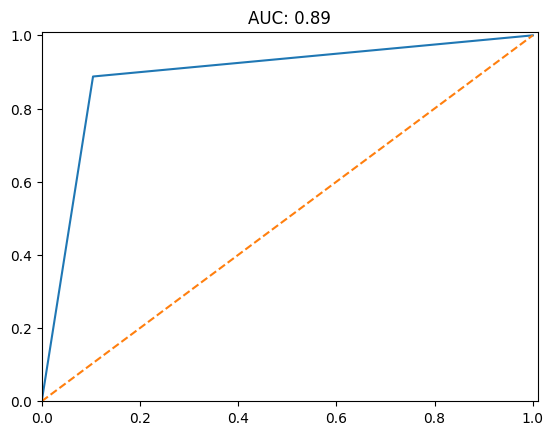

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison['Random Forest'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## Neural Network Classification

### Modelling

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=2000)

mlp.fit(X_train, Y_train)

# Training accuracy
Y_train_predict = mlp.predict(X_train)
# Validation accuracy
Y_val_predict = mlp.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.9182282793867121
Validation Classif Accuracy: 0.8231292517006803


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[231,  18],
       [ 30, 308]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.9447852760736196
Validation F1 Score: 0.7875


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 0.9112426035502958
Validation Recall: 0.875


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.9277108433734939
Validation F1 Score: 0.8289473684210527


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       249
           1       0.94      0.91      0.93       338

    accuracy                           0.92       587
   macro avg       0.91      0.92      0.92       587
weighted avg       0.92      0.92      0.92       587

Validation report
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        75
           1       0.79      0.88      0.83        72

    accuracy                           0.82       147
   macro avg       0.83      0.82      0.82       147
weighted avg       0.83      0.82      0.82       147



AUC and ROC curve

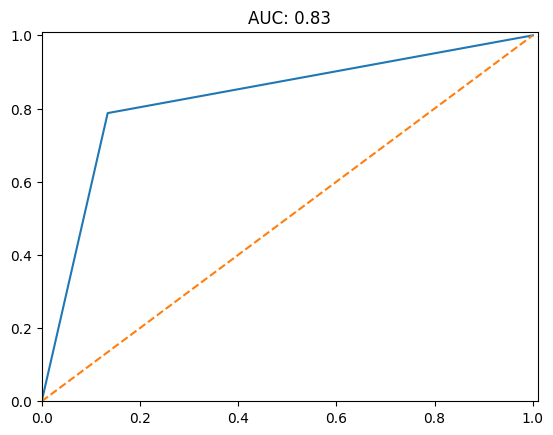

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison['Neural Network'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## XGBoost

### Modelling

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train,Y_train)

# Training accuracy
Y_train_predict = xgb_classifier.predict(X_train)
# Validation accuracy
Y_val_predict = xgb_classifier.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.9863713798977853
Validation Classif Accuracy: 0.8571428571428571


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[256,   3],
       [  5, 323]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.99079754601227
Validation F1 Score: 0.8625


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 0.9847560975609756
Validation Recall: 0.8734177215189873


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.9877675840978594
Validation F1 Score: 0.8679245283018868


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       259
           1       0.99      0.98      0.99       328

    accuracy                           0.99       587
   macro avg       0.99      0.99      0.99       587
weighted avg       0.99      0.99      0.99       587

Validation report
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        68
           1       0.86      0.87      0.87        79

    accuracy                           0.86       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.86      0.86      0.86       147



AUC and ROC curve

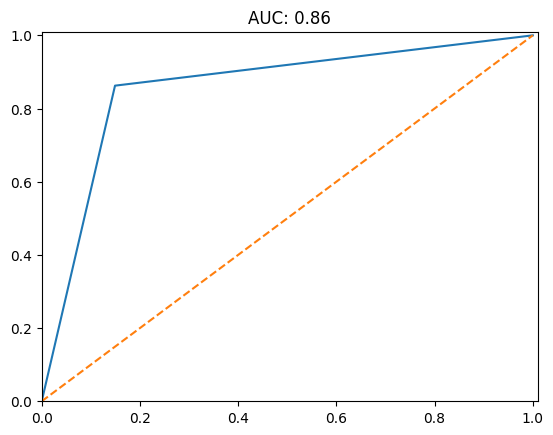

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison['XGBoost'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## GridSearch based parameter tuning

## Decision Tree

### Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': [6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [2, 3, 4]}
decision_tree = DecisionTreeClassifier(random_state=5)

grid_search_cv = GridSearchCV(decision_tree, params, verbose=1, cv=10)
grid_search_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 39 candidates, totalling 390 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_leaf_nodes': [6, 8, 10, 11, 12, 13, 14, 15, 16,
                                            17, 18, 19, 20],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=8, random_state=5)

In [ ]:
from sklearn.metrics import f1_score
# Using best parameters from GridSearch
selection = DecisionTreeClassifier(**grid_search_cv.best_params_)

# Using user defined parameters 
selection.fit(X_train, Y_train)
Y_train_predict = selection.predict(X_train)
Y_val_predict = selection.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.8568994889267462
Validation Classif Accuracy: 0.8775510204081632


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[206,  29],
       [ 55, 297]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.911042944785276
Validation F1 Score: 0.9125


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 0.84375
Validation Recall: 0.8690476190476191


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.8761061946902655
Validation F1 Score: 0.8902439024390244


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       235
           1       0.91      0.84      0.88       352

    accuracy                           0.86       587
   macro avg       0.85      0.86      0.85       587
weighted avg       0.86      0.86      0.86       587

Validation report
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        63
           1       0.91      0.87      0.89        84

    accuracy                           0.88       147
   macro avg       0.87      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



AUC and ROC curve

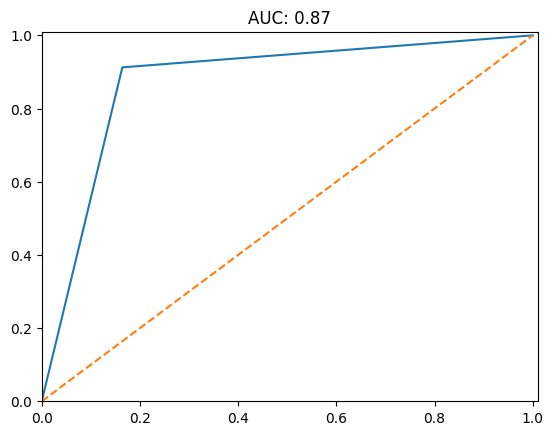

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison['Grid Decision Tree'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## Random Forest

### Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

max_depth=[2, 8, 16, 32]
n_estimators = [64, 128, 256]
min_samples_split = [2, 3, 4]
criterion = ['entropy','gini']

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, min_samples_split=min_samples_split,criterion=criterion)

random_forest = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, min_samples_split=min_samples_split,criterion=criterion)
grid_search_cv = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv = 5)
grid_search_cv.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion=['entropy', 'gini'],
                                              max_depth=[2, 8, 16, 32],
                                              min_samples_split=[2, 3, 4],
                                              n_estimators=[64, 128, 256]),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 8, 16, 32],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [64, 128, 256]})

In [ ]:
grid_search_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       n_estimators=64)

In [ ]:
from sklearn.metrics import f1_score
# Using best parameters from GridSearch
rf_grid = RandomForestClassifier(**grid_search_cv.best_params_)

# Using user defined parameters 
# selection = DecisionTreeClassifier(max_leaf_nodes=6, min_samples_split=2)

rf_grid.fit(X_train, Y_train)
Y_train_predict = rf_grid.predict(X_train)
Y_val_predict = rf_grid.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.9437819420783645
Validation Classif Accuracy: 0.8843537414965986


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[239,  11],
       [ 22, 315]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.9662576687116564
Validation F1 Score: 0.875


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 0.9347181008902077
Validation Recall: 0.9090909090909091


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.9502262443438914
Validation F1 Score: 0.8917197452229298


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       250
           1       0.97      0.93      0.95       337

    accuracy                           0.94       587
   macro avg       0.94      0.95      0.94       587
weighted avg       0.94      0.94      0.94       587

Validation report
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        70
           1       0.88      0.91      0.89        77

    accuracy                           0.88       147
   macro avg       0.89      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



AUC and ROC curve

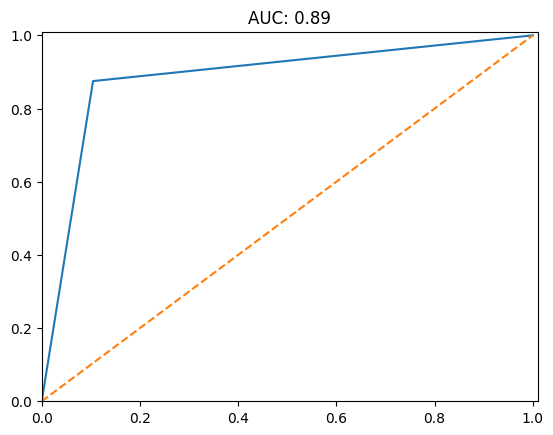

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison['Grid Random Forest'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## XGBoost

### Modelling

In [ ]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
from sklearn.metrics import f1_score
# Using best parameters from GridSearch
xg_grid = xgb.XGBClassifier(**grid_search_cv.best_params_)

# Using user defined parameters 
xg_grid.fit(X_train, Y_train)
Y_train_predict = xg_grid.predict(X_train)
Y_val_predict = xg_grid.predict(X_validation)

[09:03:50] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "min_samples_split" } are not used.



### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.9846678023850085
Validation Classif Accuracy: 0.8435374149659864


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[255,   3],
       [  6, 323]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.99079754601227
Validation F1 Score: 0.85


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 0.9817629179331308
Validation Recall: 0.8607594936708861


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.9862595419847328
Validation F1 Score: 0.8553459119496856


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       258
           1       0.99      0.98      0.99       329

    accuracy                           0.98       587
   macro avg       0.98      0.99      0.98       587
weighted avg       0.98      0.98      0.98       587

Validation report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        68
           1       0.85      0.86      0.86        79

    accuracy                           0.84       147
   macro avg       0.84      0.84      0.84       147
weighted avg       0.84      0.84      0.84       147



AUC and ROC curve

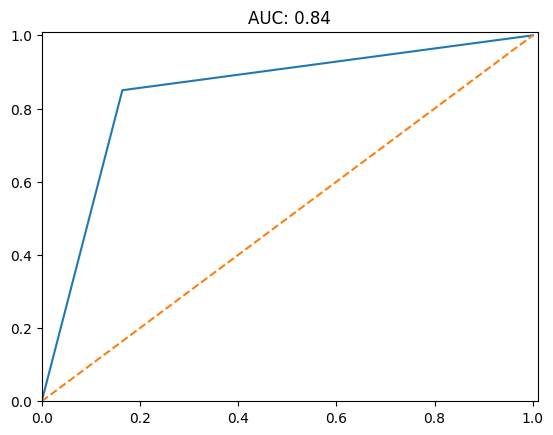

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison['Grid XGBoost'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

# Model Comparison

In [ ]:
model_comparison.style.highlight_max(color = 'green', axis = 1)

,Logistics Regression,Decision Tree,Random Forest,Neural Network,XGBoost,Grid Decision Tree,Grid Random Forest,Grid XGBoost
accuracy,0.877551,0.795918,0.891156,0.823129,0.857143,0.877551,0.884354,0.843537
precision,0.850000,0.837500,0.887500,0.787500,0.862500,0.912500,0.875000,0.850000
recall,0.918919,0.797619,0.910256,0.875000,0.873418,0.869048,0.909091,0.860759
f1,0.883117,0.817073,0.898734,0.828947,0.867925,0.890244,0.891720,0.855346
auc,0.880224,0.791884,0.891511,0.826586,0.856623,0.874160,0.885261,0.842910


Overall, from the model comparison above, it is clear that Grid Random Forest is by far the most suitable model regarding the balance between accuracy, precsion, recall, f1 score and auc score.

# Model Explanation

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
row_to_show = 17
data_for_prediction = X_train.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
print(data_for_prediction)
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
explainer = shap.TreeExplainer(rf_grid)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

Age               2.0
Gender            0.0
ChestPainType     1.0
RestingBP         2.0
Cholesterol       2.0
FastingBS         1.0
RestingECG        2.0
MaxHR             1.0
ExerciseAngina    1.0
Oldpeak           3.0
ST_Slope          0.0
Name: 149, dtype: float64


* The plot above shows how each feature contributing to push the model output from the base value for an individual data point. In this case, the chosen data point is record number 17 with related attributes as shown above. Overall, the base value of shap is around 0.4422 which indicates the less likelihood of  heart disease. However, despite the low base value, each feature impacts this value considerably, resulting in a predicted value of 0.54.
* According to the plot, main features positively pushing the prediction are ChestPainType, ExerciseAngina and MaxHR with the level of impact shown in the same order. With ChestPainType as 1, it is clear that the examined person is having Non-Anginal Pain. According to Cleverland Clinic, Non-Anginal Pain is often described as feeling like angina, a chest pain caused by heart disease. In addition, Non-Anginal Pain is generally caused by anxiety, depression or stress, muscle strains which are not common causes of heart disease. Similarly, with ExerciseAngina equals to 1, patient is less likely to have heart disease. Also, the MaxHR group is 1, indicating patient having maximum heart rate between 140 and 170 may have less chances of having heart disease.
* In contrast, major features that negatively push the prediction are ST_Slope, Oldpeak and FastingBS. With ST_Slope equals to 0, this increases the likelihood of a heart disease as this flat and horizontal ST segment can be seen in healthy individuals. Similarly, FastingBS equals to 1, representing fasting blood sugar higher than 120 mg/dl and indicating higher chances of prediabetes and diabetes which can be contributors to heart disease.

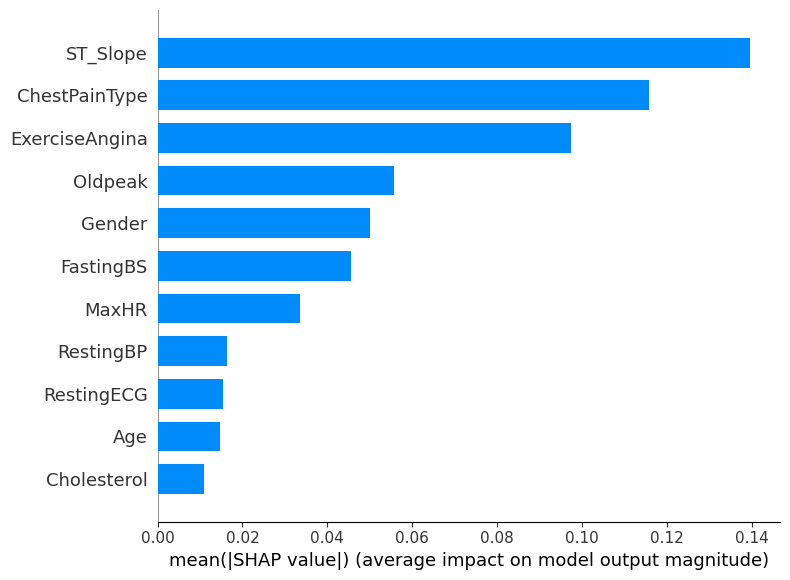

In [ ]:
explainer = shap.TreeExplainer(rf_grid)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[0], X_train, plot_type="bar")

From the feature importance graph above, ST_Slope, ChestPainType and ExerciseAngina are the most importanct features contributing greatly to the outcome of the models.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


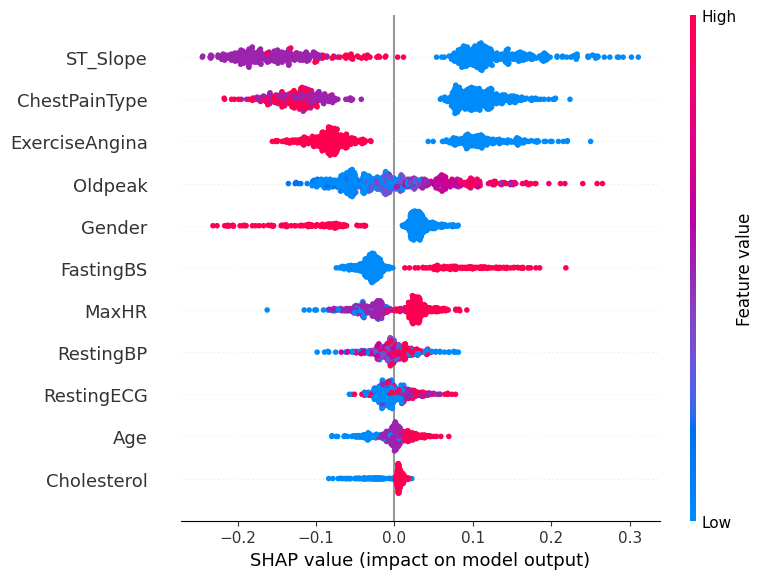

In [ ]:
shap.summary_plot(shap_values[1], X_train)

The above plot provides more precise and detailed information about the impact of different values of each attribute to the outcome of the model whether patient have a heart disease or not.
* It is clear that the lower values of ST_Slope have a negative impact on the outcome of the model, indicating the lower ST_Slope reprents higher likelihood of heart disease, whereas, the higher ST_Slope represents the opposite
* Regarding the value of ChestPainType is lower, such as 0 or 1, this shows a negative impact on the outcome of the model. This indicates that the first two types of chest pain (ASY and NAP) are more likely the cause of heart disease, whereas the other two types (ATA and TA) may be not be main contributors to heart disease.
* Considering Age, the higher ages show positive impact, whereas, the lower present negative impact. This indicates that older patients are more likely to develop heart disease, whereas, younger ones are less likely to develop this.
* In terms of Oldpeak, lower oldpeak values present a negative impact. This is true as the normal level of oldpeak that is less than 1 can be seen in healthy patients.
* With regard to Cholesterol, the lower cholesterol levels would reduce the likelihood of heart disease, whereas, higher levels increase the chances.
* Finally, the higher the maximum heart rate indicates lower probability of having a heart disease.


# Further adjustments to improve the accuracy of models

In [ ]:
df2 = df.copy()

df2.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1000,42,M,ATA,120,198,0,Normal,155,N,0.0,Up,0
1,PT1001,54,M,ASY,140,239,0,Normal,160,N,1.2,Up,0
2,PT1002,60,M,NAP,141,316,1,ST,122,Y,1.7,Flat,1
3,PT1003,54,M,ASY,124,266,0,LVH,109,Y,2.2,Flat,1
4,PT1004,55,M,ATA,160,292,1,Normal,143,Y,2.0,Flat,1


In [ ]:
df_test2 = df_test.copy()

df_test2.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,PT1800,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down
1,PT1801,58,M,ASY,114,318,0,ST,140,N,4.4,Down
2,PT1802,47,F,ATA,140,257,0,Normal,135,N,1.0,Up
3,PT1803,64,M,ASY,141,244,1,ST,116,Y,1.5,Flat
4,PT1804,47,M,NAP,110,0,1,Normal,120,Y,0.0,Flat


In [ ]:
corr = df2.corrwith(df2['HeartDisease']).sort_values(ascending = False).to_frame()

corr

,0
HeartDisease,1.000000
Oldpeak,0.403008
Age,0.290536
FastingBS,0.264346
RestingBP,0.130579
Cholesterol,-0.250587
MaxHR,-0.410548


## Skewness of Continuous variables

In [ ]:
# Train
# determine index for continouse variables
cts_vars = df2.dtypes[df.dtypes != 'object'].index

# Calculate the skewness and then sort
skew_vars = df2[cts_vars].skew().sort_values(ascending=False)
print(skew_vars)

FastingBS       1.256959
Oldpeak         1.049206
RestingBP       0.133332
MaxHR          -0.143912
Age            -0.201733
HeartDisease   -0.214182
Cholesterol    -0.596636
dtype: float64


In [ ]:
# Test
# determine index for continouse variables
cts_vars = df_test2.dtypes[df.dtypes != 'object'].index

# Calculate the skewness and then sort
skew_vars = df_test2[cts_vars].skew().sort_values(ascending=False)
print(skew_vars)

FastingBS      1.305552
Oldpeak        0.966607
RestingBP      0.352207
MaxHR         -0.125704
Age           -0.183748
Cholesterol   -0.669019
dtype: float64


The output shows the skewness values for each numerical variable in the dataset. The values range from negative to positive, with 0 indicating a perfectly symmetrical distribution. A positive skewness value indicates that the distribution of data is skewed to the right, with a long tail towards higher values. In this case, we can see that 'FastingBS' and Oldpeak having the high skewness value of 1.25 and 1.04 (in train dataset) which requires further treatments in the next steps.

## Similar Data Processing Steps

0 values imputation

Train

In [ ]:
df2['Cholesterol'] = df2['Cholesterol'].replace(0, df2['Cholesterol'].median())

In [ ]:
df2['RestingBP'] = df2['RestingBP'].replace(0, df2['RestingBP'].median())

Test

In [ ]:
df_test2['Cholesterol'] = df_test2['Cholesterol'].replace(0, df_test2['Cholesterol'].median())

In [ ]:
df_test2['RestingBP'] = df_test2['RestingBP'].replace(0, df_test2['RestingBP'].median())

Check outliers

Cholesterol

In [ ]:
# Train
# Calculate the 25th and 75th percentile (Q1 and Q3)
Q1 = df2['Cholesterol'].quantile(0.25)
Q3 = df2['Cholesterol'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use clip to set maximum or minimum to the points outside the range
df2['Cholesterol'] = df2['Cholesterol'].clip(lower_bound, upper_bound)

In [ ]:
# Test
# Calculate the 25th and 75th percentile (Q1 and Q3)
Q1 = df_test2['Cholesterol'].quantile(0.25)
Q3 = df_test2['Cholesterol'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use clip to set maximum or minimum to the points outside the range
df_test2['Cholesterol'] = df_test2['Cholesterol'].clip(lower_bound, upper_bound)

RestingBP

In [ ]:
# Train
# Calculate the 25th and 75th percentile (Q1 and Q3)
Q1 = df2['RestingBP'].quantile(0.25)
Q3 = df2['RestingBP'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use clip to set maximum or minimum to the points outside the range
df2['RestingBP'] = df2['RestingBP'].clip(lower_bound, upper_bound)

In [ ]:
# Test
# Calculate the 25th and 75th percentile (Q1 and Q3)
Q1 = df_test2['RestingBP'].quantile(0.25)
Q3 = df_test2['RestingBP'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use clip to set maximum or minimum to the points outside the range
df_test2['RestingBP'] = df_test2['RestingBP'].clip(lower_bound, upper_bound)

Transforming Categorical Variables to Numeric Variables

In [ ]:
# Train
ST_Slope_mapping = {"Flat": 0, "Up": 1, "Down": 2, }
df2['ST_Slope'] = df2['ST_Slope'].map(ST_Slope_mapping)

ExerciseAngina_mapping = {"Y": 0, "N": 1, }
df2['ExerciseAngina'] = df2['ExerciseAngina'].map(ExerciseAngina_mapping)

RestingECG_mapping = {"Normal": 0, "LVH": 1,"ST": 2, }
df2['RestingECG'] = df2['RestingECG'].map(RestingECG_mapping)

ChestPainType_mapping = {"ASY": 0, "NAP": 1,"ATA": 2,"TA": 3, }
df2['ChestPainType'] = df2['ChestPainType'].map(ChestPainType_mapping)

Gender_mapping = {"M": 0, "F": 1 }
df2['Gender'] = df2['Gender'].map(Gender_mapping)

In [ ]:
# Test
ST_Slope_mapping = {"Flat": 0, "Up": 1, "Down": 2, }
df_test2['ST_Slope'] = df_test2['ST_Slope'].map(ST_Slope_mapping)

ExerciseAngina_mapping = {"Y": 0, "N": 1, }
df_test2['ExerciseAngina'] = df_test2['ExerciseAngina'].map(ExerciseAngina_mapping)

RestingECG_mapping = {"Normal": 0, "LVH": 1,"ST": 2, }
df_test2['RestingECG'] = df_test2['RestingECG'].map(RestingECG_mapping)

ChestPainType_mapping = {"ASY": 0, "NAP": 1,"ATA": 2,"TA": 3, }
df_test2['ChestPainType'] = df_test2['ChestPainType'].map(ChestPainType_mapping)

Gender_mapping = {"M": 0, "F": 1 }
df_test2['Gender'] = df_test2['Gender'].map(Gender_mapping)

## Standardization and normalization  

Scaling is the process of transforming variables to a common scale, in order to make the variables comparable and improve the performance of machine learning algorithms.  
Normalization is the rescaling of features to a range of [0,1], which is a special case of min-max scaling. In this case, the 'MinMaxScaler' is used to scale the 'Oldpeak' variable to a range between 0 and 1 in order to handle skewness of this attribute.
'StandardScaler' is being used to scale 'Age', 'RestingBP', 'Cholesterol', and 'MaxHR' to  performs standardization (scaling those variables to have a mean of 0 and standard deviation of 1.)  and to ensure that those variables contribute equally to the analysis as well as prevent any one feature from dominating the others.

In [ ]:
# Train
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalize= MinMaxScaler()
standard= StandardScaler()
df2['Oldpeak']= normalize.fit_transform(df2[['Oldpeak']])
df2['Age']= standard.fit_transform(df2[['Age']])
df2['RestingBP']= standard.fit_transform(df2[['RestingBP']])
df2['Cholesterol']= standard.fit_transform(df2[['Cholesterol']])
df2['MaxHR']= standard.fit_transform(df2[['MaxHR']])
df2.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1000,-1.218505,0,2,-0.743095,-0.881208,0,0,0.722367,1,0.243902,1,0
1,PT1001,0.041781,0,0,0.413798,0.028023,0,0,0.916829,1,0.390244,1,0
2,PT1002,0.671923,0,1,0.471643,1.735602,1,2,-0.561076,0,0.451220,0,1
3,PT1003,0.041781,0,0,-0.511716,0.626784,0,1,-1.066675,0,0.512195,0,1
4,PT1004,0.146804,0,2,1.570692,1.203369,1,0,0.255661,0,0.487805,0,1


In [ ]:
# Test
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalize= MinMaxScaler()
standard= StandardScaler()
df_test2['Oldpeak']= normalize.fit_transform(df_test2[['Oldpeak']])
df_test2['Age']= standard.fit_transform(df_test2[['Age']])
df_test2['RestingBP']= standard.fit_transform(df_test2[['RestingBP']])
df_test2['Cholesterol']= standard.fit_transform(df_test2[['Cholesterol']])
df_test2['MaxHR']= standard.fit_transform(df_test2[['MaxHR']])
df_test2.head()

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,PT1800,1.201531,0,0,0.241368,0.696112,0,0,-1.495465,0,0.868421,2
1,PT1801,0.537289,0,0,-0.963833,1.686924,0,2,0.068443,1,0.921053,2
2,PT1802,-0.680486,1,2,0.602928,0.343823,0,0,-0.137334,1,0.473684,1
3,PT1803,1.201531,0,0,0.663188,0.057588,1,2,-0.919288,0,0.539474,0
4,PT1804,-0.680486,0,1,-1.204873,-0.404791,1,0,-0.754666,0,0.342105,0


Standardization and normalization can change the relationship between variables. Hence it is important to check if the correlations have changed significantly. 

In [ ]:
corr = df2.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()

corr

,0
HeartDisease,1.000000
Oldpeak,0.403008
Age,0.290536
FastingBS,0.264346
RestingBP,0.140124
RestingECG,0.117885
Cholesterol,0.031207
Gender,-0.296663
ST_Slope,-0.400517
MaxHR,-0.410548


The result above shows that after the aforementioned data pre-processing steps, ResingBP and RestingECG have the lowest correlation with HeartDisease, therefore, these two attributes can be dropped as they may not have any impact on the target attribute and may create biases in the modelling process.

Remove unused attribute

In [ ]:
# Train
df2.drop('Id', axis=1, inplace=True)

In [ ]:
# Test
Id = df_test2['Id']
df_test2.drop('Id', axis=1, inplace=True)

In [ ]:
# Train
df2.drop('RestingECG', axis=1, inplace=True)

df2.drop('RestingBP', axis=1, inplace=True)

In [ ]:
# Test
df_test2.drop('RestingECG', axis=1, inplace=True)

df_test2.drop('RestingBP', axis=1, inplace=True)

In [ ]:
df2.head()

,Age,Gender,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.218505,0,2,-0.881208,0,0.722367,1,0.243902,1,0
1,0.041781,0,0,0.028023,0,0.916829,1,0.390244,1,0
2,0.671923,0,1,1.735602,1,-0.561076,0,0.451220,0,1
3,0.041781,0,0,0.626784,0,-1.066675,0,0.512195,0,1
4,0.146804,0,2,1.203369,1,0.255661,0,0.487805,0,1


# Modelling and Evaluation

## Data split

In [ ]:
# Train
df_y = df2['HeartDisease']
df_x = df2.drop('HeartDisease', axis=1)

In [ ]:
# Test
df_x_test = df_test2

In [ ]:
from sklearn.model_selection  import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(df_x, df_y, test_size = 0.2, random_state = 5)

## Logistic Regression

### Modelling

In [ ]:
from sklearn import linear_model

reg = linear_model.LogisticRegression()
reg.fit(X_train, Y_train)

# Training accuracy
Y_train_predict = reg.predict(X_train)
# Validation accuracy
Y_val_predict = reg.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.8466780238500852
Validation Classif Accuracy: 0.8639455782312925


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[212,  41],
       [ 49, 285]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.8742331288343558
Validation F1 Score: 0.8375


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 0.8532934131736527
Validation Recall: 0.9054054054054054


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.8636363636363636
Validation F1 Score: 0.8701298701298702


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       253
           1       0.87      0.85      0.86       334

    accuracy                           0.85       587
   macro avg       0.84      0.85      0.84       587
weighted avg       0.85      0.85      0.85       587

Validation report
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        73
           1       0.84      0.91      0.87        74

    accuracy                           0.86       147
   macro avg       0.87      0.86      0.86       147
weighted avg       0.87      0.86      0.86       147



AUC and ROC curve

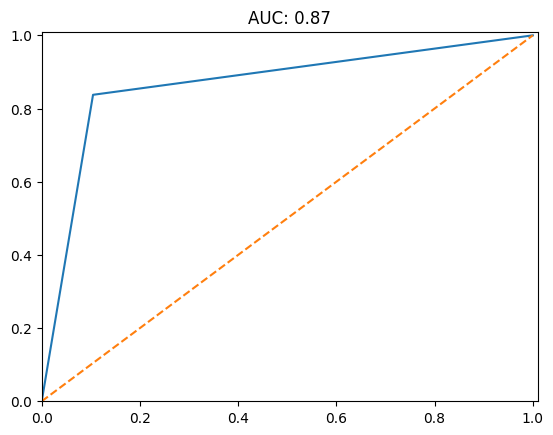

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison_2 = pd.DataFrame({'Logistics Regression': [accuracy_val,precision_val,recall_val,f1_val,auc]},index=['accuracy','precision','recall','f1','auc'])

## Decision Tree Classification

### Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Training accuracy
Y_train_predict = dt.predict(X_train)
# Validation accuracy
Y_val_predict = dt.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 1.0
Validation Classif Accuracy: 0.8095238095238095


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[261,   0],
       [  0, 326]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 1.0
Validation F1 Score: 0.775


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 1.0
Validation Recall: 0.8611111111111112


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 1.0
Validation F1 Score: 0.8157894736842106


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       326

    accuracy                           1.00       587
   macro avg       1.00      1.00      1.00       587
weighted avg       1.00      1.00      1.00       587

Validation report
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        75
           1       0.78      0.86      0.82        72

    accuracy                           0.81       147
   macro avg       0.81      0.81      0.81       147
weighted avg       0.81      0.81      0.81       147



AUC and ROC curve

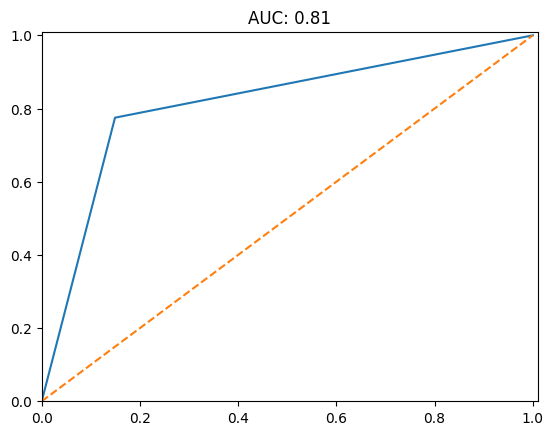

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison_2['Decision Tree'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## Random Forest

### Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Training accuracy
Y_train_predict = rf.predict(X_train)
# Validation accuracy
Y_val_predict = rf.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 1.0
Validation Classif Accuracy: 0.8843537414965986


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[261,   0],
       [  0, 326]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 1.0
Validation F1 Score: 0.875


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 1.0
Validation Recall: 0.9090909090909091


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 1.0
Validation F1 Score: 0.8917197452229298


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       326

    accuracy                           1.00       587
   macro avg       1.00      1.00      1.00       587
weighted avg       1.00      1.00      1.00       587

Validation report
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        70
           1       0.88      0.91      0.89        77

    accuracy                           0.88       147
   macro avg       0.89      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



AUC and ROC curve

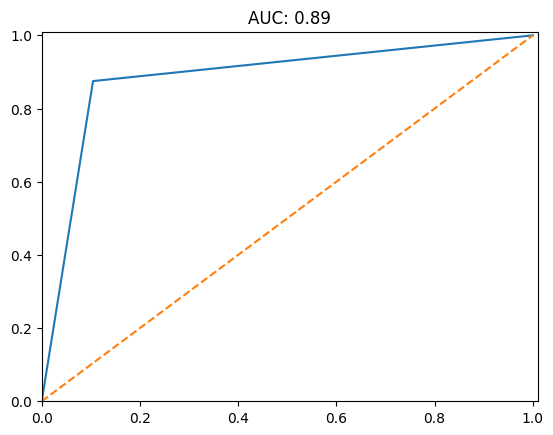

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison_2['Random Forest'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## Neural Network Classification

### Modelling

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=2000)

mlp.fit(X_train, Y_train)

# Training accuracy
Y_train_predict = mlp.predict(X_train)
# Validation accuracy
Y_val_predict = mlp.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.8875638841567292
Validation Classif Accuracy: 0.8707482993197279


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[223,  28],
       [ 38, 298]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.9141104294478528
Validation F1 Score: 0.875


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 0.8869047619047619
Validation Recall: 0.8860759493670886


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.9003021148036254
Validation F1 Score: 0.8805031446540881


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       251
           1       0.91      0.89      0.90       336

    accuracy                           0.89       587
   macro avg       0.88      0.89      0.89       587
weighted avg       0.89      0.89      0.89       587

Validation report
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        68
           1       0.88      0.89      0.88        79

    accuracy                           0.87       147
   macro avg       0.87      0.87      0.87       147
weighted avg       0.87      0.87      0.87       147



AUC and ROC curve

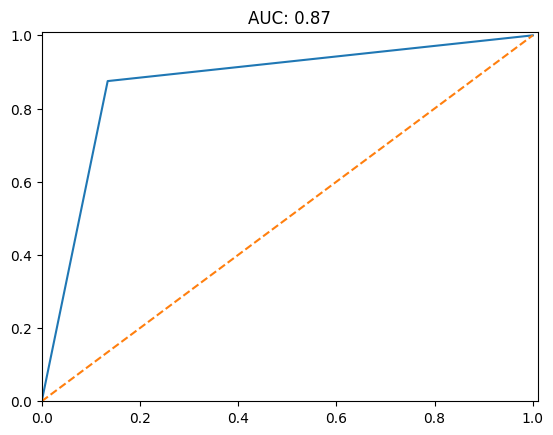

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison_2['Neural Network'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## XGBoost

### Modelling

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train,Y_train)

# Training accuracy
Y_train_predict = xgb_classifier.predict(X_train)
# Validation accuracy
Y_val_predict = xgb_classifier.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 1.0
Validation Classif Accuracy: 0.8639455782312925


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[261,   0],
       [  0, 326]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 1.0
Validation F1 Score: 0.8375


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 1.0
Validation Recall: 0.9054054054054054


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 1.0
Validation F1 Score: 0.8701298701298702


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       326

    accuracy                           1.00       587
   macro avg       1.00      1.00      1.00       587
weighted avg       1.00      1.00      1.00       587

Validation report
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        73
           1       0.84      0.91      0.87        74

    accuracy                           0.86       147
   macro avg       0.87      0.86      0.86       147
weighted avg       0.87      0.86      0.86       147



AUC and ROC curve

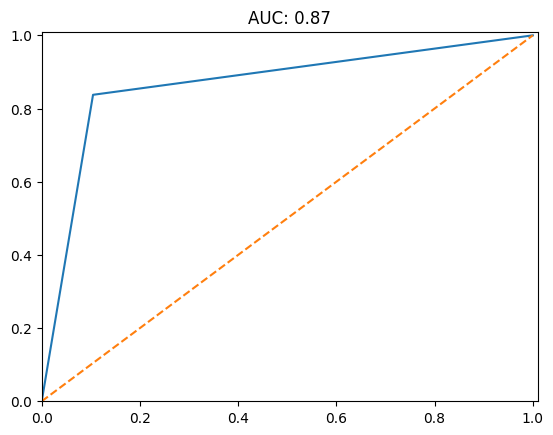

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison_2['XGBoost'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## GridSearch based parameter tuning

## Decision Tree

### Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': [6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [2, 3, 4]}
decision_tree = DecisionTreeClassifier(random_state=5)

grid_search_cv = GridSearchCV(decision_tree, params, verbose=1, cv=10)
grid_search_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 39 candidates, totalling 390 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_leaf_nodes': [6, 8, 10, 11, 12, 13, 14, 15, 16,
                                            17, 18, 19, 20],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=8, random_state=5)

In [ ]:
from sklearn.metrics import f1_score
# Using best parameters from GridSearch
selection = DecisionTreeClassifier(**grid_search_cv.best_params_)

# Using user defined parameters 
selection.fit(X_train, Y_train)
Y_train_predict = selection.predict(X_train)
Y_val_predict = selection.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.8637137989778535
Validation Classif Accuracy: 0.8639455782312925


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[217,  36],
       [ 44, 290]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 0.8895705521472392
Validation F1 Score: 0.875


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 0.8682634730538922
Validation Recall: 0.875


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 0.8787878787878789
Validation F1 Score: 0.875


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       253
           1       0.89      0.87      0.88       334

    accuracy                           0.86       587
   macro avg       0.86      0.86      0.86       587
weighted avg       0.86      0.86      0.86       587

Validation report
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        67
           1       0.88      0.88      0.88        80

    accuracy                           0.86       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.86      0.86      0.86       147



AUC and ROC curve

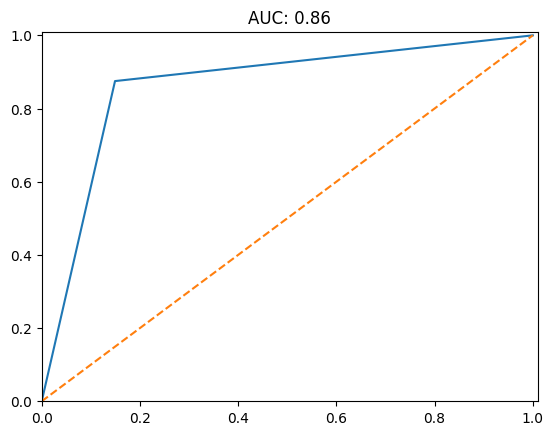

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison_2['Grid Decision Tree'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## Random Forest

### Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

max_depth=[2, 8, 16, 32]
n_estimators = [64, 128, 256]
min_samples_split = [2, 3, 4]
criterion = ['entropy','gini']

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, min_samples_split=min_samples_split,criterion=criterion)

random_forest = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, min_samples_split=min_samples_split,criterion=criterion)
grid_search_cv = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv = 5)
grid_search_cv.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion=['entropy', 'gini'],
                                              max_depth=[2, 8, 16, 32],
                                              min_samples_split=[2, 3, 4],
                                              n_estimators=[64, 128, 256]),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 8, 16, 32],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [64, 128, 256]})

In [ ]:
grid_search_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=128)

In [ ]:
from sklearn.metrics import f1_score
# Using best parameters from GridSearch
rf_grid = RandomForestClassifier(**grid_search_cv.best_params_)

# Using user defined parameters 
# selection = DecisionTreeClassifier(max_leaf_nodes=6, min_samples_split=2)

rf_grid.fit(X_train, Y_train)
Y_train_predict = rf_grid.predict(X_train)
Y_val_predict = rf_grid.predict(X_validation)

### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 0.959114139693356
Validation Classif Accuracy: 0.8979591836734694


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[261,   0],
       [  0, 326]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 1.0
Validation F1 Score: 0.875


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 1.0
Validation Recall: 0.8974358974358975


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 1.0
Validation F1 Score: 0.8860759493670887


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       326

    accuracy                           1.00       587
   macro avg       1.00      1.00      1.00       587
weighted avg       1.00      1.00      1.00       587

Validation report
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        69
           1       0.88      0.90      0.89        78

    accuracy                           0.88       147
   macro avg       0.88      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



AUC and ROC curve

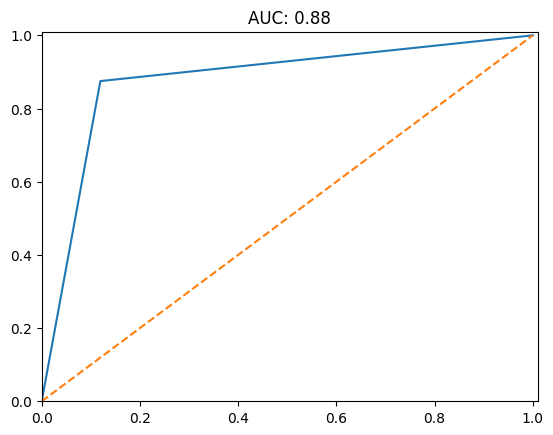

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison_2['Grid Random Forest'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

## XGBoost

### Modelling

In [ ]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
from sklearn.metrics import f1_score
# Using best parameters from GridSearch
xg_grid = xgb.XGBClassifier(**grid_search_cv.best_params_)

# Using user defined parameters 
xg_grid.fit(X_train, Y_train)
Y_train_predict = xg_grid.predict(X_train)
Y_val_predict = xg_grid.predict(X_validation)

[01:01:38] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "min_samples_split" } are not used.



### Evaluation Metrics

Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

# Error calculation 
accuracy_train = accuracy_score(Y_train_predict, Y_train)
print('Training Classif Accuracy: ' + str(accuracy_train))
accuracy_val = accuracy_score(Y_val_predict, Y_validation)
print('Validation Classif Accuracy: ' + str(accuracy_val))

Training Classif Accuracy: 1.0
Validation Classif Accuracy: 0.8775510204081632


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_predict, Y_train)

array([[261,   0],
       [  0, 326]])

Precision

In [ ]:
from sklearn.metrics import precision_score

# Error calculation 
precision_train = precision_score(Y_train_predict, Y_train)
print('Training Precision: ' + str(precision_train))
precision_val = precision_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(precision_val))

Training Precision: 1.0
Validation F1 Score: 0.8375


Recall

In [ ]:
from sklearn.metrics import recall_score

# Error calculation 
recall_train = recall_score(Y_train_predict, Y_train)
print('Training Recall: ' + str(recall_train))
recall_val = recall_score(Y_val_predict, Y_validation)
print('Validation Recall: ' + str(recall_val))

Training Recall: 1.0
Validation Recall: 0.9305555555555556


F1-Score

In [ ]:
from sklearn.metrics import f1_score

# Error calculation 
f1_train = f1_score(Y_train_predict, Y_train)
print('Training F1 Score: ' + str(f1_train))
f1_val = f1_score(Y_val_predict, Y_validation)
print('Validation F1 Score: ' + str(f1_val))

Training F1 Score: 1.0
Validation F1 Score: 0.881578947368421


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_train_predict, Y_train)
print('Training report\n', report)

report = classification_report(Y_val_predict, Y_validation)
print('Validation report\n', report)

Training report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       326

    accuracy                           1.00       587
   macro avg       1.00      1.00      1.00       587
weighted avg       1.00      1.00      1.00       587

Validation report
               precision    recall  f1-score   support

           0       0.93      0.83      0.87        75
           1       0.84      0.93      0.88        72

    accuracy                           0.88       147
   macro avg       0.88      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147



AUC and ROC curve

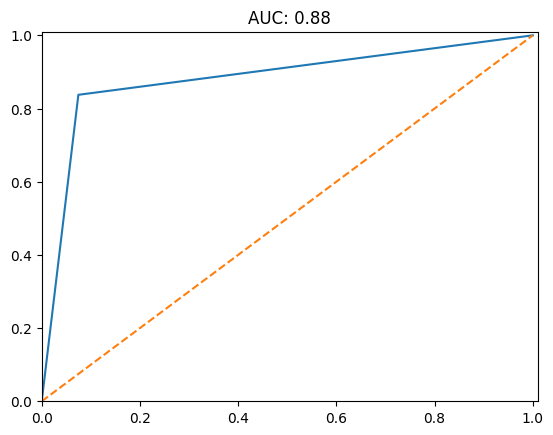

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(Y_validation, Y_val_predict)
fpr, tpr, thresholds = roc_curve(Y_validation, Y_val_predict, pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.title('AUC: {}'.format(round(auc, 2)))
plt.show()

In [ ]:
model_comparison_2['Grid XGBoost'] = [accuracy_val,precision_val,recall_val,f1_val,auc]

# Model Comparison

In [ ]:
model_comparison_2.style.highlight_max(color = 'green', axis = 1)

,Logistics Regression,Decision Tree,Random Forest,Neural Network,XGBoost,Grid Decision Tree,Grid Random Forest,Grid XGBoost
accuracy,0.863946,0.809524,0.884354,0.870748,0.863946,0.863946,0.877551,0.877551
precision,0.837500,0.775000,0.875000,0.875000,0.837500,0.875000,0.875000,0.837500
recall,0.905405,0.861111,0.909091,0.886076,0.905405,0.875000,0.897436,0.930556
f1,0.870130,0.815789,0.891720,0.880503,0.870130,0.875000,0.886076,0.881579
auc,0.866511,0.812873,0.885261,0.870336,0.866511,0.862873,0.877799,0.881437


# Model Explanation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

pd.DataFrame({'Variable':X_train.columns,
              'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
8,ST_Slope,0.184234
2,ChestPainType,0.169723
5,MaxHR,0.142320
7,Oldpeak,0.122396
3,Cholesterol,0.109164
0,Age,0.106181
6,ExerciseAngina,0.096297
1,Gender,0.037931
4,FastingBS,0.031755


In [ ]:
row_to_show = 17
data_for_prediction = X_train.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
explainer = shap.TreeExplainer(rf_grid)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

The graph presented illustrates the impact of each feature on the prediction output for a given data point, specifically record number 17. The base value of the SHAP (SHapley Additive exPlanations) model for this data point is approximately 0.4436, indicating a lower likelihood of heart disease. However, each feature has a significant impact on the predicted value, resulting in a final prediction of 0.65.
The highest impact to predict that patients are less likely to be heart disease is MaxHR=0.9168, while ST_Slope = 0 (flat) has the most effect of decreasing the prediction. 


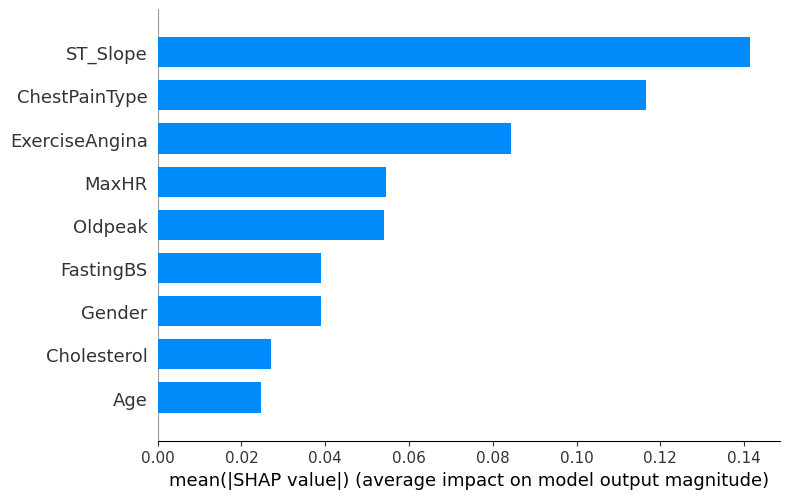

In [ ]:
explainer = shap.TreeExplainer(rf_grid)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values[0], X_train, plot_type="bar")

From the feature importance graph above, ST_Slope, ChestPainType and ExerciseAngina are the most importanct features contributing greatly to the outcome of the models.

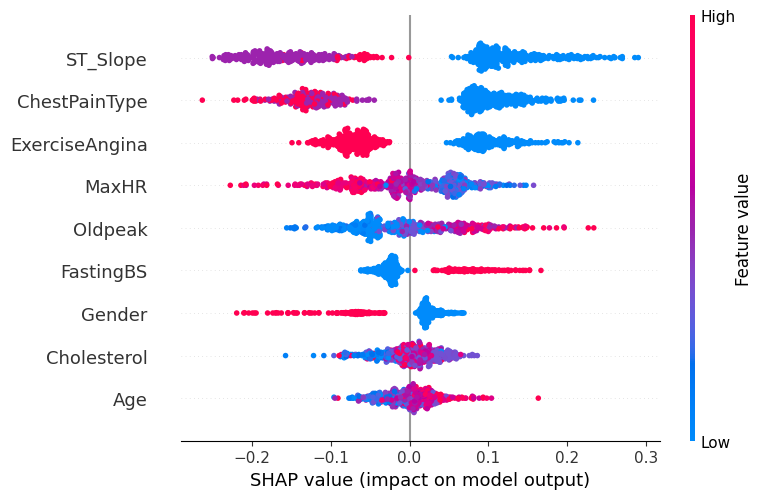

In [ ]:
shap.summary_plot(shap_values[1], X_train)

The above graph displays how various attributes impact the model's outcome, which predicts the likelihood of heart disease. Lower values of ST_Slope and ChestPainType have a negative impact, suggesting a higher probability of heart disease, while higher values of these attributes indicate the opposite. Age and Oldpeak also affect the model's outcome, with higher ages and lower Oldpeak values indicating a higher likelihood of heart disease. On the other hand, a higher maximum heart rate has a positive impact on the model's outcome, indicating a lower probability of heart disease.

# Predictions of test data

In [ ]:
df_x_test

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,2,0,0,2,2.0,0,0,2,0,4.0,2
1,1,0,0,0,2.0,0,2,1,1,4.4,2
2,1,1,2,3,2.0,0,0,2,1,1.0,1
3,2,0,0,3,2.0,1,2,2,0,1.5,0
4,1,0,1,0,2.0,1,0,2,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
179,1,0,2,0,2.0,0,0,0,1,0.0,1
180,1,0,2,3,2.0,1,2,1,1,0.5,0
181,1,1,2,0,2.0,0,0,1,1,0.0,1
182,1,0,1,3,2.0,0,0,2,1,0.0,1


In [ ]:
result = rf_grid.predict(df_x_test)

In [ ]:
result

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
df_powerbi = pd.read_csv('test_dataset.csv')

In [ ]:
df_powerbi['RestingBP'] = df_powerbi['RestingBP'].replace(0, df_powerbi['RestingBP'].median())
df_powerbi['Cholesterol'] = df_powerbi['Cholesterol'].replace(0, df_powerbi['Cholesterol'].median())

In [ ]:
df_result = pd.DataFrame({'Id':Id})

In [ ]:
df_result['HeartDisease'] = result.tolist()

In [ ]:
df_with_predictions = pd.concat([df_powerbi, df_result['HeartDisease']], axis=1)


In [ ]:
df_with_predictions

,Id,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,PT1800,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
1,PT1801,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1
2,PT1802,47,F,ATA,140,257,0,Normal,135,N,1.0,Up,0
3,PT1803,64,M,ASY,141,244,1,ST,116,Y,1.5,Flat,1
4,PT1804,47,M,NAP,110,223,1,Normal,120,Y,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,PT1979,49,M,ATA,100,253,0,Normal,174,N,0.0,Up,0
180,PT1980,60,M,ATA,160,267,1,ST,157,N,0.5,Flat,1
181,PT1981,50,F,ATA,110,202,0,Normal,145,N,0.0,Up,0
182,PT1982,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0


In [ ]:
df_with_predictions.to_csv('df_with_predictions.csv',index=False)

In [ ]:
df_result

,Id,HeartDisease
0,PT1800,1
1,PT1801,1
2,PT1802,0
3,PT1803,1
4,PT1804,1
...,...,...
179,PT1979,0
180,PT1980,0
181,PT1981,0
182,PT1982,0


In [ ]:
df_result.to_csv('result.csv',index=False)

# REFERFENCES

https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/diagnosis-treatment/drc-20350806  
https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings  
https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates#:~:text=Your%20maximum%20heart%20rate%20is%20about%20220%20minus%20your%20age.